In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import json
import os
import pandas as pd
from numpy.random import randint

# CCU Graph

This class gets the JSON files that contain the information about the rooms and generates a connected graph for each floor.

In [3]:
class CCUGraph():
    
    def __init__(self):
        # init vars
        self.get_directories()
        self.layout_names = ['circular', 'bipartite', 'kamada', 'planar'
               'random', 'rescale', 'shell', 'spring', 'spectral','spiral']
        
    def get_directories(self):
        
        os.chdir('/Users/indp/Dropbox/phd/contactTracingCCU/OpenTrace') 
        
        self.cwd = os.getcwd()
        self.data_dir = self.cwd + str('/JSON')
        os.chdir(self.data_dir)

        # Get map names
        self.map_names = []
        for e in os.listdir():
            if e != 'TEST':
                if e != '.DS_Store':
                    self.map_names.append(e)
        
        os.chdir(self.data_dir)
        
    def get_map_data(self, map_name):
        
        print('Getting data from ', map_name, 'map.')
        self.sat_viv = self.data_dir + str('/' + map_name)
        os.chdir(self.sat_viv)
    
        # JSON structure
        # dimensions = size_of_room, id = id_of_room(number), 
        # label = name_of_room, map = name_of_map, position, type = Room, Access
            
        room_data = []
        file_list = os.listdir()
        self.n_files = len(file_list)
        for e in file_list:
            with open(e,'r') as json_file:
                data = json_file.read()
                room_data.append(json.loads(data))
        
        return room_data
        
    def generate_map_graph(self, map_name):
        
        room_data = self.get_map_data(map_name)
        
        # Graph object
        self.G = nx.Graph()
        self.G = nx.Graph(name = map_name)
        
        for i,room in enumerate(room_data):
            self.G.add_node(room['id'])
        for e in room_data:
            if e['type'] == 'Access':
                for j in self.G:
                    self.G.add_edge(j,e['id'])

    def draw_map_graph(self, layout):
        # draw the graph
        #pos = nx.spring_layout(self.G)
        
        print(layout)
        
        if layout == 'circular':
            pos = nx.circular_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        #if layout == 'bipartite':
        #    pos = nx.bipartite_layout(self.G)
        if layout == 'kamada':
            pos = nx.kamada_kawai_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        if layout == 'planar':
            pos = nx.planar_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        if layout == 'random':
            pos = nx.random_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        #if layout == 'rescale':
        #    pos = nx.rescale_layout(self.G)
        if layout == 'shell':
            pos = nx.shell_layout(self.G)            
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        if layout == 'spring':
            pos = nx.spring_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        if layout == 'spectral':
            pos = nx.spectral_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        if layout == 'spiral':
            pos = nx.spiral_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        else:
            pos = nx.circular_layout(self.G)
            nx.draw(self.G, pos)
            nx.draw_networkx_labels(self.G, pos)
        
    def get_all_graphs(self):
        self.RoomGraphs = []
        for i, map_name in enumerate(self.map_names):
            self.RoomGraphs.append(CCUGraph())
            self.RoomGraphs[i].get_map_data(map_name)
            self.RoomGraphs[i].generate_map_graph(map_name)

            #self.RoomGraphs[i].draw_map_graph('spiral')
            #plt.show()

        
    def visit_room(self, person_id, room_name):
        for i,e in enumerate(self.room_data):
            if e['label'] == room_name:
                self.room_visits[person_id,i] += 1

In [4]:
gr = CCUGraph()
gr.get_all_graphs()

Getting data from  First Floor map.
Getting data from  First Floor map.
Getting data from  First Floor West map.
Getting data from  First Floor West map.
Getting data from  Ground Floor map.
Getting data from  Ground Floor map.
Getting data from  Main Vivarium map.
Getting data from  Main Vivarium map.
Getting data from  Satellite Vivarium map.
Getting data from  Satellite Vivarium map.
Getting data from  Second Floor map.
Getting data from  Second Floor map.
Getting data from  Underground map.
Getting data from  Underground map.


First Floor


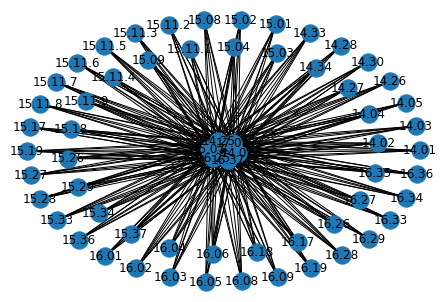

First Floor West


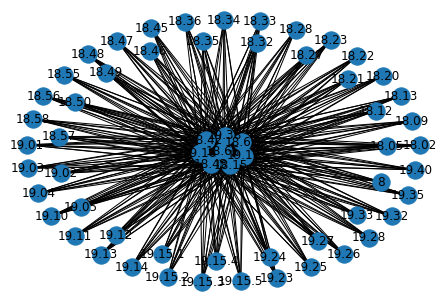

Main Vivarium


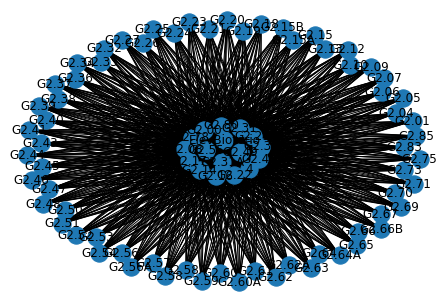

Satellite Vivarium


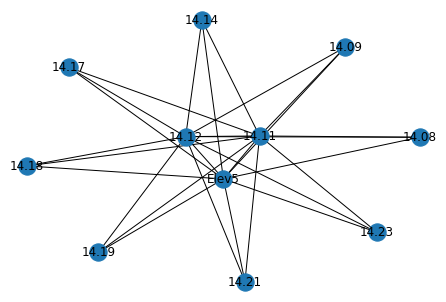

Second Floor


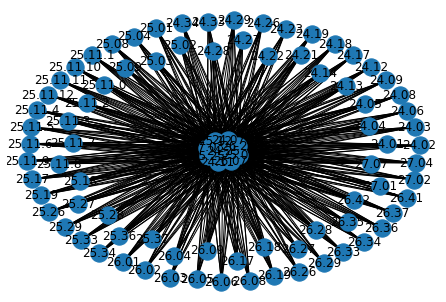

In [6]:
n_rooms = []
for e in gr.RoomGraphs:
    if e.n_files != 0:
        print(e.G.name)
        n_rooms.append(len(list(e.G)))
        pos = nx.kamada_kawai_layout(e.G)
        nx.draw(e.G, pos)
        nx.draw_networkx_labels(e.G, pos)
        plt.show()

# Test Dataset

In order to test the analysis functions we need to create a test dataset with the same structure as the one present in the contact-tracing server.

Current goals:
* Calculate histograms and heatmpas of the usage of each room
    * What other visualizations can we?
* Assuming an ID is infected, what people where in the same room as that person in the past N days that need to be contacted?

In [7]:
def generate_person_ids(n_people):
    person_ids = []
    for e in np.random.randn(n_people):
        person_ids.append(str(e)[3:9])
    person_ids = np.asarray(person_ids)
    if n_people != np.unique(person_ids).shape:
        return person_ids
    else:
        print('NUI')
        
def generate_timestamps(init_period, n_of_days):
    #data ex - '8/5/2020'
    timestamps = pd.date_range(start=init_period, periods = n_of_days)
    return timestamps

In [11]:
def get_test_dataset(n_rooms, n_people, init_period, n_of_days, avg_ppl_day):
    
    print('Total number of rooms', n_rooms)
    room_ids = np.arange(0,n_rooms,1)

    d = {}
    d['person_id'] = [] 
    d['time_stamp'] = []
    for r in room_ids:
        d[r] = []
    df = pd.DataFrame(data=d)
    
    person_ids = generate_person_ids(n_people)
    t_stamps = generate_timestamps('08/05/2020', 7)
    
    c = 0
    for i,e in enumerate(t_stamps):
        print(e)
        for j in range(avg_ppl_day):
            df.loc[c] = [str(np.random.choice(person_ids))] + [e] + list(randint(0,2, size=n_rooms))
            c+=1

    return df

In [12]:
get_test_dataset(300, 300, '08/05/2020', 7, 3)

Total number of rooms 300
2020-08-05 00:00:00
2020-08-06 00:00:00
2020-08-07 00:00:00
2020-08-08 00:00:00
2020-08-09 00:00:00
2020-08-10 00:00:00
2020-08-11 00:00:00


,person_id,time_stamp,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,492780,2020-08-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,096892,2020-08-05,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,089056,2020-08-05,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3,584553,2020-08-06,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,316308,2020-08-06,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
5,305253,2020-08-06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
6,124431,2020-08-07,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7,522691,2020-08-07,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8,016449,2020-08-07,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,492780,2020-08-08,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
